In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import pickle
xgb.set_config(verbosity=1) #turn down info

import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_set = pd.read_csv('train_set.csv')
val_set = pd.read_csv('test_set.csv')
test_set = pd.read_csv('final_testing_set.csv')

In [3]:
train_set.head()

,EMPL_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET
0,201175,-0.006608,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,44156,0.114995,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92415,0.110264,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34197,-0.843917,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64822,1.177423,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_set.head()

,EMPL_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_9.,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na
0,19992,0.840996,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,92175,-1.326991,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,136186,-1.358992,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,254111,-0.216423,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,241931,1.116482,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = np.array(train_set['TARGET'])
x_train = np.array(train_set.drop(['TARGET', 'EMPL_ID' ], axis=1))

y_val = np.array(val_set['TARGET'])
x_val = np.array(val_set.drop(['TARGET', 'EMPL_ID' ], axis=1))

## y_test does not exists 
x_test = np.array(test_set.drop(['EMPL_ID'], axis=1))

In [6]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape)

(1075926, 202) (1075926,)
(358643, 202) (358643,)
(964775, 202)


# Check model performance: accuracy, precision, recall


### Train set

In [7]:
file_name = "xgb_model.pkl"

xgb_model_loaded = pickle.load(open(file_name, "rb"))

y_pred = xgb_model_loaded.predict(x_train)
y_true = y_train

accuracy = sum(y_pred == y_true)/ len(y_pred)
recall_score = sklearn.metrics.recall_score( y_true, y_pred) 
precision_score = sklearn.metrics.precision_score(y_true, y_pred) 

print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))
print("Presicion on testing set:", precision_score)
print("Recall on testing set:", recall_score)


Accuracy on testing set: 89.2220 %
Presicion on testing set: 0.7578299576643274
Recall on testing set: 0.56405160686958


In [8]:
train_set['PREDICTION'] = y_pred
train_set.head(20)

,EMPL_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET,PREDICTION
0,201175,-0.006608,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,44156,0.114995,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92415,0.110264,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34197,-0.843917,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64822,1.177423,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,107985,-0.034435,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,90072,-0.074784,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,126233,-1.348696,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,245907,-1.232658,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,152413,-1.336452,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Validation set

In [15]:
file_name = "xgb_model.pkl"

xgb_model_loaded = pickle.load(open(file_name, "rb"))

y_pred = xgb_model_loaded.predict(x_val)
y_true = y_val

accuracy = sum(y_pred == y_true)/ len(y_pred)
recall_score = sklearn.metrics.recall_score( y_true, y_pred) 
precision_score = sklearn.metrics.precision_score(y_true, y_pred) 

print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))
print("Presicion on testing set:", precision_score)
print("Recall on testing set:", recall_score)


Accuracy on testing set: 89.2849 %
Presicion on testing set: 0.756448476992871
Recall on testing set: 0.5632207942609898


In [16]:
val_set['PREDICTION'] = y_pred
val_set.head(20)

,EMPL_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET,PREDICTION
0,237843,-0.372253,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52452,0.332601,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,243099,1.221667,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,138628,-1.219301,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,154230,-0.271798,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,150457,0.638417,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,242341,0.769203,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,220667,-0.059758,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,55816,1.035784,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,217170,0.196806,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 13.421126458070283, 'Predicted label')

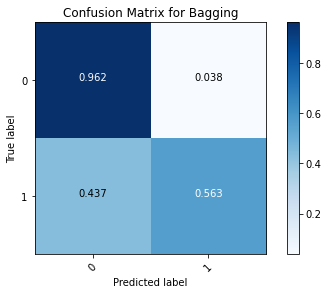

In [17]:
classes = [0,1]
cm = confusion_matrix(y_true, y_pred, normalize ='true')

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for Bagging")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3), horizontalalignment="center", color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Final predictions:

In [11]:
file_name = "xgb_model.pkl"
xgb_model_loaded = pickle.load(open(file_name, "rb"))
y_pred = xgb_model_loaded.predict(x_test)

In [12]:
test_set['PREDICTION'] = y_pred
test_set.head()

,EMPL_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,PREDICTION
0,19992,0.840996,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,92175,-1.326991,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,136186,-1.358992,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,254111,-0.216423,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,241931,1.116482,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
test_set[['EMPL_ID', 'PREDICTION']].to_csv('final_testing_solution.csv',index = False)